In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

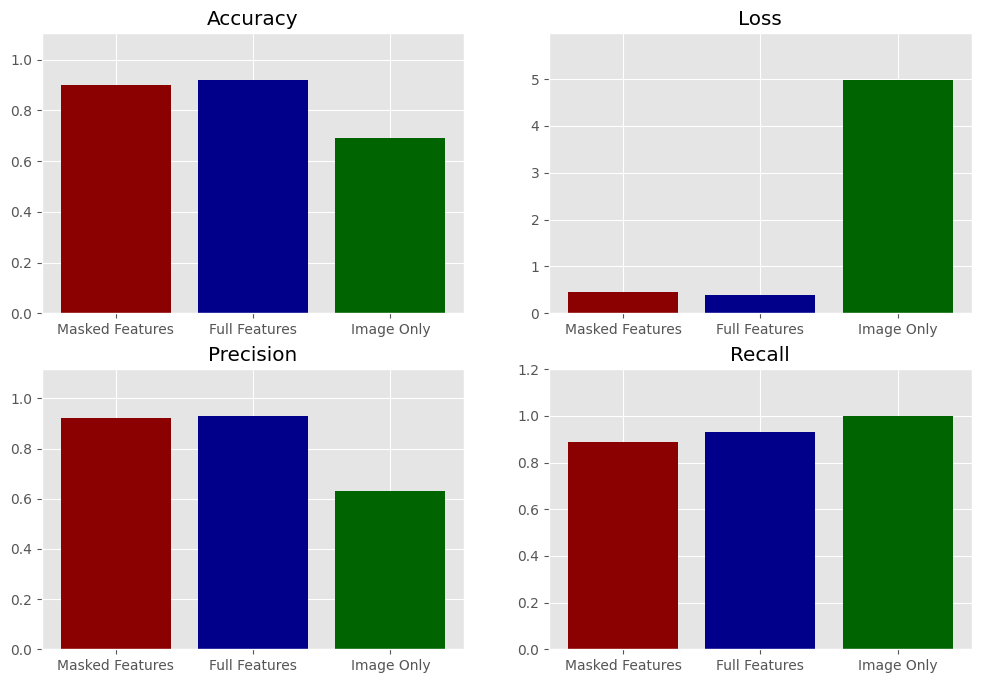

In [3]:
masked_features = {
    "val_accuracy": 0.90,
    "val_loss": 0.46,
    "val_precision": 0.92,
    "val_recall": 0.89
}
full_features = {
    "val_accuracy": 0.92,
    "val_loss": 0.39,
    "val_precision": 0.93,
    "val_recall": 0.93
}
image_only = {
    "val_accuracy": 0.69,
    "val_loss": 4.98,
    "val_precision": 0.63,
    "val_recall": 1.00
}   
metrics = ["val_accuracy", "val_loss", "val_precision", "val_recall"]
models = ["Masked Features", "Full Features", "Image Only"]

data = {
    "val_accuracy": [masked_features["val_accuracy"], full_features["val_accuracy"], image_only["val_accuracy"]],
    "val_loss" : [masked_features["val_loss"], full_features["val_loss"], image_only["val_loss"]],
    "val_precision": [masked_features["val_precision"], full_features["val_precision"], image_only["val_precision"]],
    "val_recall": [masked_features["val_recall"], full_features["val_recall"], image_only["val_recall"]]
}
plt.style.use('ggplot') 

fig, ax = plt.subplots(2, 2, figsize=(12,8))
axs = ax.flatten()
for i, metric in enumerate(metrics):
    axs[i].bar(models, data[metric], color=['darkred', 'darkblue', 'darkgreen'])
    axs[i].set_title(metric.replace("val_", "").capitalize())
    axs[i].set_ylim(0, max(data[metric]) * 1.2)
plt.savefig('C:\\Users\\clombardi\\abalation_study.png')

In [84]:
import json

filepath = "C:/Users/clombardi/ImageProcessingClone/src/mlruns/666790921765345951/c1a1f085055845ee865c39d98d1335ed/artifacts/test_episodes.json"

with open(filepath, 'r') as f:
    data = json.load(f)

In [85]:
episode_info = []
for j, episode in enumerate(data['episodes']):
    info = episode['episode info']
    for i in info:
        metrics = {
            "episode": j + 1,
            "current tension": i['current_tension'],
            "current ideal tension": i["current_ideal_tension"],
            "action": i['action']
        }
        episode_info.append(metrics)
df = pd.DataFrame(episode_info)
df['action'] = df['action']*20

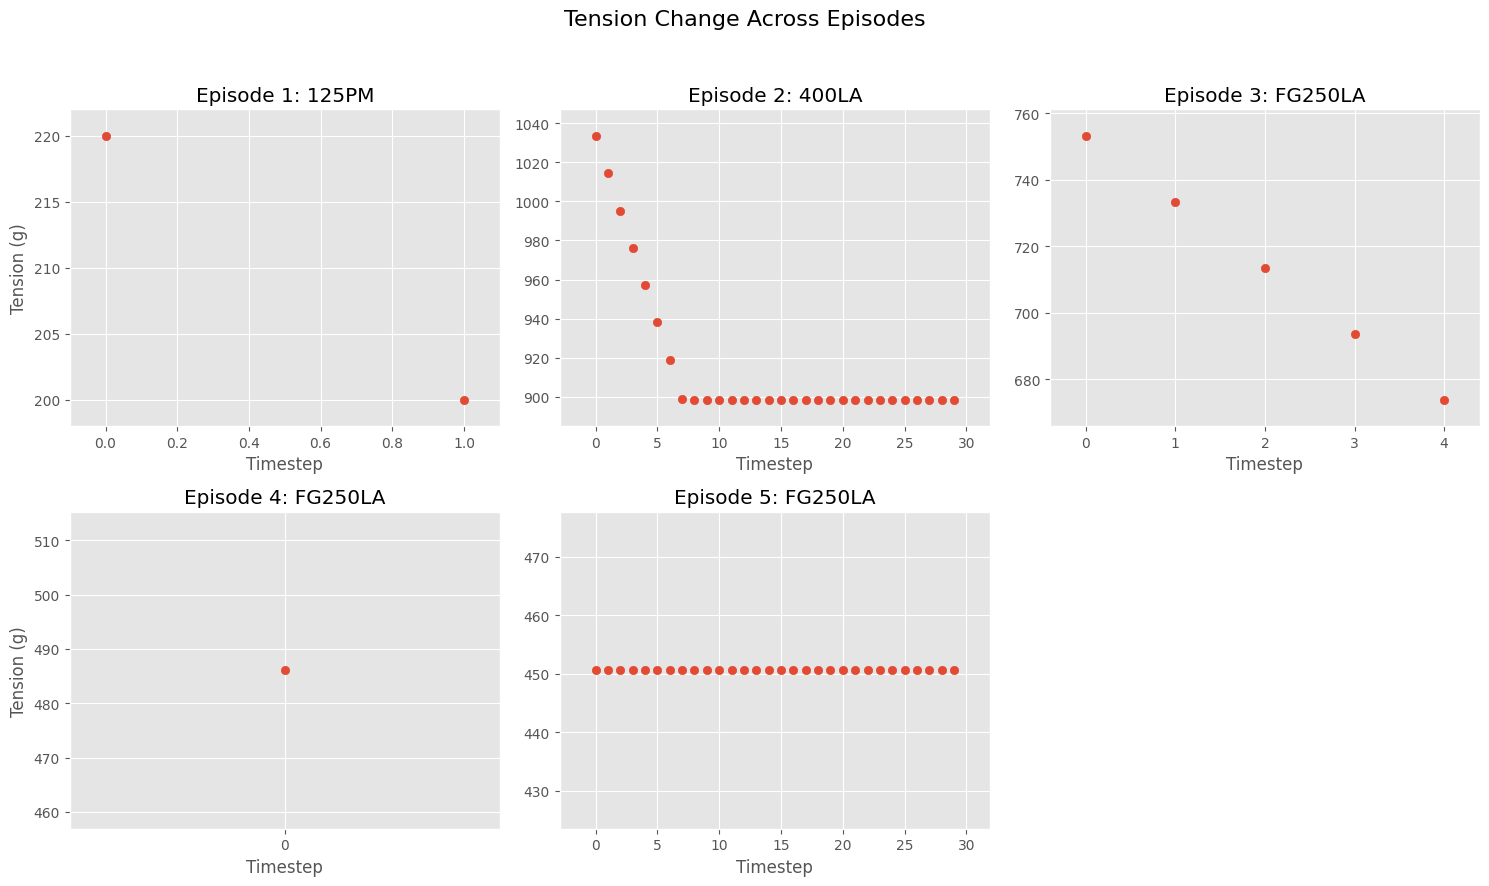

In [92]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()  

fibers = ["125PM", "400LA", "FG250LA", "FG250LA", "FG250LA"]

for i, episode in enumerate(range(1, 6)):
    ax = axes[i]
    tensions = df.loc[df['episode'] == episode, 'current tension']
    y = np.arange(len(tensions))
    ax.scatter(y, tensions)
    ax.set_title(f'Episode {episode}: {fibers[i]}')
    ax.set_xlabel('Timestep')
    if i == 3:
        ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.margins(x=0.1, y=0.1)
    if i % 3 == 0: 
        ax.set_ylabel('Tension (g)')

axes[5].axis('off')

plt.suptitle("Tension Change Across Episodes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("C:\\Users\\clombardi\\RL_training1.png")
plt.show()

In [93]:
filepath = "C:/Users/clombardi/ImageProcessingClone/src/mlruns/666790921765345951/797e5b4501574cfb89e5ef7eaff05eb0/artifacts/test_episodes.json"
with open(filepath, 'r') as f:
    data = json.load(f)

In [100]:
episode_info = []
for j, episode in enumerate(data['episodes']):
    fiber_type = episode['Fiber Type:']
    info = episode['episode info']
    for i in info:
        metrics = {
            "fiber type": fiber_type,
            "episode": j + 1,
            "current tension": i['current_tension'],
            "current ideal tension": i["current_ideal_tension"],
            "action": i['action']
        }
        episode_info.append(metrics)
df = pd.DataFrame(episode_info)
df['action'] = df['action']*20

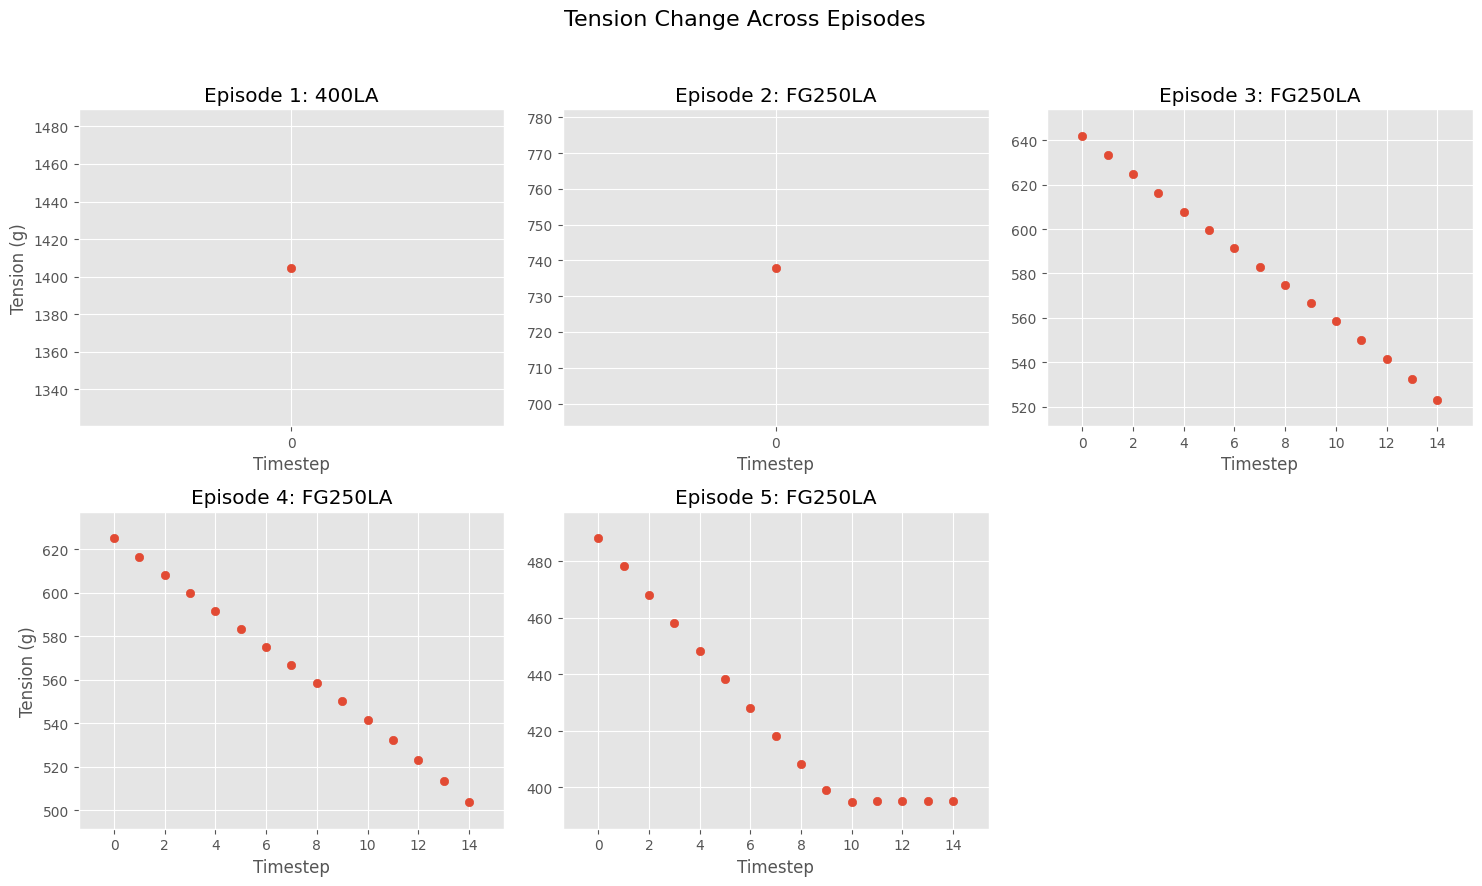

In [109]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()  


for i, episode in enumerate(range(1, 6)):
    ax = axes[i]
    tensions = df.loc[df['episode'] == episode, 'current tension']
    fiber_type = df['fiber type'][i]
    y = np.arange(len(tensions))
    ax.scatter(y, tensions)
    ax.set_title(f'Episode {episode}: {fiber_type}')
    ax.set_xlabel('Timestep')
    if len(tensions) == 1:
        ax.set_xticks([0,1])
    ax.margins(x=0.1, y=0.1)
    if i % 3 == 0: 
        ax.set_ylabel('Tension (g)')

axes[5].axis('off')

plt.suptitle("Tension Change Across Episodes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("C:\\Users\\clombardi\\RL_training2.png")
plt.show()